In [4]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import nltk
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
emails = pd.read_csv('emails.csv')
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
emails = emails.drop_duplicates(keep = 'last') #remove all duplicate emails from the dataframe
emails

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


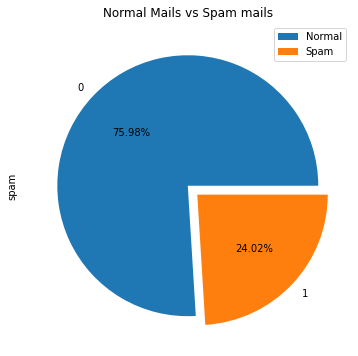

In [8]:
#data visualization using matplotlib
emails.spam.value_counts().plot(kind='pie',
                                    explode=[0,.1],
                                    figsize=(6,6),
                                    autopct='%.2f%%')
plt.title('Normal Mails vs Spam mails')
plt.legend(['Normal','Spam'])
plt.show()

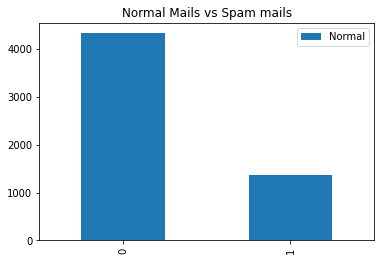

In [9]:
#data visualization using matplotlib
emails.spam.value_counts().plot(kind='bar')
plt.title('Normal Mails vs Spam mails')
plt.legend(['Normal','Spam'])
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_37556\4080131872.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(emails['spam'],bins = 5)


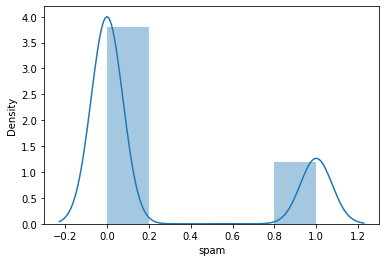

In [10]:
seaborn.distplot(emails['spam'],bins = 5)
plt.show()

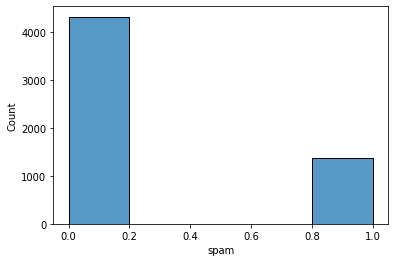

In [11]:
seaborn.histplot(emails['spam'],bins = 5)
plt.show()

In [12]:
emails.spam.value_counts()

0    4327
1    1368
Name: spam, dtype: int64

In [13]:
# allocating data to the variables
spam_messages = emails[emails['spam']==1]['text']
notspam_messages = emails[emails['spam']==0]['text']

In [14]:
spam_words = []
notspam_words = []

In [15]:
#creating a function for tokenizing the text using nltk
def tokenize_spam_words(text):
    words = [w.lower() for w in word_tokenize(text) if w.lower() not in stopwords.words('english') and w.lower().isalpha()]
    spam_words.extend(words)

def tokenize_notspam_words(text):
    words = [w.lower() for w in word_tokenize(text) if w.lower() not in stopwords.words('english') and w.lower().isalpha()]
    notspam_words.extend(words)

In [16]:
#tokenizing the spam messages (takes some time)
spam_messages.apply(tokenize_spam_words)
print(spam_words[:100])

['subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [17]:
#tokenizing the not spam messages (takes some time)
notspam_messages.apply(tokenize_notspam_words)
print(notspam_words[:100])

['subject', 'hello', 'guys', 'bugging', 'completed', 'questionnaire', 'one', 'page', 'bio', 'statement', 'thoughts', 'business', 'edu', 'new', 'economy', 'records', 'incorrect', 'please', 'ship', 'responses', 'want', 'put', 'everything', 'together', 'next', 'week', 'ship', 'back', 'everyone', 'questionnaire', 'attached', 'well', 'copies', 'bio', 'pages', 'michael', 'froehls', 'two', 'somewhat', 'different', 'approaches', 'idea', 'latter', 'introduce', 'panelists', 'give', 'background', 'approaching', 'issues', 'discuss', 'also', 'provide', 'copies', 'attendees', 'use', 'material', 'personal', 'introductions', 'opening', 'panel', 'discussions', 'thanks', 'look', 'forward', 'seeing', 'two', 'weeks', 'john', 'waco', 'background', 'mf', 'doc', 'jmartinbiosketch', 'doc', 'questionnaire', 'doc', 'john', 'martin', 'carr', 'p', 'collins', 'chair', 'finance', 'finance', 'department', 'baylor', 'university', 'po', 'box', 'waco', 'tx', 'office', 'fax', 'j', 'martin', 'baylor', 'edu', 'web', 'http

In [18]:
#stemming 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [19]:
def cleanup_text(message):
    message = message.translate(str.maketrans('','',string.punctuation))
    words = [stemmer.stem(w) for w in message.split() if w.lower() not in stopwords.words('english') ]
    return ' '.join(words) 

In [20]:
emails.text = emails.text.apply(cleanup_text)

C:\Users\krish\AppData\Local\Temp\ipykernel_37556\4217212453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails.text = emails.text.apply(cleanup_text)


In [21]:
emails

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject 4 color print special request addit in...,1
4,subject money get softwar cd softwar compat gr...,1
...,...,...
5723,subject research develop charg gpg forward shi...,0
5724,subject receipt visit jim thank invit visit ls...,0
5725,subject enron case studi updat wow day super t...,0
5726,subject interest david pleas call shirley cren...,0


In [22]:
#feautre extraction using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words = 'english')

In [23]:
features = vect.fit_transform(emails.text)
features.shape

(5695, 29096)

In [24]:
# saving the feautures using the pickle
import pickle

with open('count_vectorizer.pkl','wb') as f:
    pickle.dump(vect,f)
print('done')

done


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# data preprocessing for training the model
from sklearn.preprocessing import LabelEncoder
#labeling the data
category =  LabelEncoder()
emails.spam = category.fit_transform(emails.spam)

C:\Users\krish\AppData\Local\Temp\ipykernel_37556\1360167376.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emails.spam = category.fit_transform(emails.spam)


In [27]:
emails.head()

,text,spam
0,subject natur irresist corpor ident lt realli ...,1
1,subject stock trade gunsling fanni merril muzo...,1
2,subject unbeliev new home made easi im want sh...,1
3,subject 4 color print special request addit in...,1
4,subject money get softwar cd softwar compat gr...,1


In [28]:
#splitting the data into training and testing data
x_train, x_test, y_train,y_test = train_test_split(features.toarray(), emails.spam,test_size=.2)

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [30]:
#creating a machine learning model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [31]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[844,  13],
       [ 32, 250]], dtype=int64)

C:\Users\krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


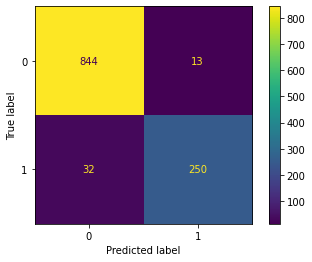

In [32]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)  
plt.show()

In [33]:
#accuracy score
accuracy_score(y_test,y_pred)

0.9604916593503073

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [35]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[857,   0],
       [ 18, 264]], dtype=int64)

C:\Users\krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


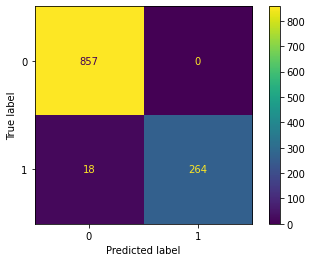

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test)  
plt.show()

In [37]:
#accuracy score
accuracy_score(y_test,y_pred)

0.9841966637401229

In [38]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

In [39]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[855,   2],
       [  9, 273]], dtype=int64)

C:\Users\krish\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


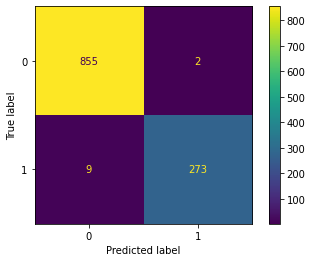

In [40]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model2, x_test, y_test)  
plt.show()

In [41]:
#accuracy score
accuracy_score(y_test,y_pred)

0.990342405618964

In [42]:
#saving the builded model using pickle
import pickle
with open('spam_classifier.pkl','wb') as f:
    pickle.dump(model,f)
print('done')

done
